In [3]:
import pandas as pd
import numpy as np

In [4]:
#Path on my system to training data
train_path = "./../Datasets/Fall examples/Fall examples/Farseeing/Data/Train/"

In [5]:
#Read all training data files
from os import walk

data_for_fall=[]

for (dirpath, dirnames, filenames) in walk(train_path):
    
    for file in filenames:
        print(dirpath+file)
        data = pd.read_csv(dirpath+file)
        data.columns = ['Time','Rel_Time','Acc_X','Acc_Y','Acc_Z','Mg_X','Mg_Y','Mg_Z','Ang_X','Ang_Y','Ang_Z','Fall_indicator']
        data_for_fall.append(data)

./../Datasets/Fall examples/Fall examples/Farseeing/Data/Train/F_04835861-01-2013-10-16-13-19-35.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Train/F_17744725-01-2009-02-24-16-26-44.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Train/F_20983985-01-2013-05-16-16-16-00.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Train/F_23112025-01-2013-05-21-06-21-54.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Train/F_36551836-01-2013-05-21-17-39-57.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Train/F_38243026-05-2009-04-29-08-53-16.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Train/F_42990421-03a-2011-03-23-16-50-02.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Train/F_47451392-01-2014-01-22-22-42-34.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Train/F_63414187-01-2013-05-30-22-48-27.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Train/F_67458491-01-2013-11-07-12

In [6]:
#Print one file data in training
data_for_fall[0]

,Time,Rel_Time,Acc_X,Acc_Y,Acc_Z,Mg_X,Mg_Y,Mg_Z,Ang_X,Ang_Y,Ang_Z,Fall_indicator
0,184020.0,735520.0,2.0243,-8.4086,-2.95860,0,0,0,0,0,0,0
1,184020.0,735520.0,2.0243,-8.4086,-2.95860,0,0,0,0,0,0,0
2,184020.0,735520.0,2.0243,-8.4086,-2.95860,0,0,0,0,0,0,0
3,184020.0,735520.0,2.0243,-8.4086,-2.95860,0,0,0,0,0,0,0
4,184020.0,735520.0,2.0243,-8.4086,-2.95860,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23995,185220.0,735520.0,8.7200,-1.8686,0.31143,0,0,0,0,0,0,0
23996,185220.0,735520.0,8.7200,-1.8686,0.31143,0,0,0,0,0,0,0
23997,185220.0,735520.0,8.7200,-1.8686,0.31143,0,0,0,0,0,0,0
23998,185220.0,735520.0,8.7200,-1.8686,0.31143,0,0,0,0,0,0,0


In [7]:
train_data = pd.concat(data_for_fall,ignore_index=True)
train_data.shape

(1248000, 12)

In [8]:
fall_event_loc = train_data[train_data['Fall_indicator']>0].index
fall_event_loc

Int64Index([  11999,   83999,  155999,  179999,  203999,  275999,  395999,
             467999,  491999,  515999,  587999,  589280,  707999,  827999,
             947999, 1067999, 1187999],
           dtype='int64')

In [9]:
data_fall_event = []
for fall_loc in fall_event_loc:
    data_fall_event.append(train_data.iloc[fall_loc - 10: fall_loc + 10])

In [10]:
fall_event = pd.concat(data_fall_event,ignore_index=True)
fall_event

,Time,Rel_Time,Acc_X,Acc_Y,Acc_Z,Mg_X,Mg_Y,Mg_Z,Ang_X,Ang_Y,Ang_Z,Fall_indicator
0,184620.0,735520.0,-2.0243,-11.21100,19.6200,0.000,0.000,0.0000,0,0,0,0
1,184620.0,735520.0,-9.8100,-1.71290,5.9171,0.000,0.000,0.0000,0,0,0,0
2,184620.0,735520.0,-12.1460,5.91710,2.6471,0.000,0.000,0.0000,0,0,0,0
3,184620.0,735520.0,19.6200,-0.46714,-1.2457,0.000,0.000,0.0000,0,0,0,0
4,184620.0,735520.0,6.2286,-1.86860,12.7690,0.000,0.000,0.0000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
335,48967.0,734660.0,28.1420,22.44900,24.7590,76.019,-221.740,-43.4460,0,0,0,0
336,48967.0,734660.0,29.4870,16.39700,11.1350,95.480,-221.760,-125.8100,0,0,0,0
337,48967.0,734660.0,20.1300,5.58760,1.5153,95.903,-17.669,-109.5400,0,0,0,0
338,48967.0,734660.0,-5.4511,2.20970,13.7490,71.782,116.170,-24.6890,0,0,0,0


In [11]:
# features = ['Acc_X','Acc_Y','Acc_Z']
# fall_pattern = fall_event[features].values.flatten()
# fall_pattern.shape

In [12]:
features = ['Acc_X','Acc_Y','Acc_Z']
fall_pattern_list=[]
for fall_each_event_index in list(range(20, fall_event.shape[0]+20, 20)):
    fall_each_event = fall_event[fall_each_event_index-20:fall_each_event_index]
    fall_pattern_list.append(fall_each_event[features].values.flatten())
fall_pattern =  np.stack(fall_pattern_list, axis=0)

In [13]:
#There are 16 files for training - each fall event has 20 data points
fall_pattern.shape

(17, 60)

In [14]:
def get_window_data(data, step_size=1, feature_size=3):
    index=0
    sample=[]
    while True:
        if index + feature_size >= len(data):
            index=0
            return sample
        sample.append(data.iloc[index:index + feature_size,:])
        index = index + step_size 

In [15]:
#feature size = 20 (each fall event is 20 rows long)
samples_train = [get_window_data(data, feature_size=20) for data in data_for_fall]

In [16]:
len(samples_train)

16

In [17]:
#feature size = 20 (each fall event is 20 rows long)
# samples_train = get_window_data(train_data, feature_size=20)

In [18]:
len(samples_train)

16

In [19]:
def to_features(data):
    feature_columns = ['Acc_X','Acc_Y','Acc_Z']
    sensor_values = data[feature_columns].values 
    features = sensor_values.flatten()
    return features

In [20]:
train_fall_data = np.stack([ to_features(d) for samples in samples_train for d in samples ])

In [21]:
train_fall_data.shape

(1247680, 60)

In [22]:
V = np.cov(np.array(train_fall_data.T))
V

array([[22.19061927, -0.46606257, -4.45523789, ..., 21.97358339,
        -0.4618888 , -4.45968825],
       [-0.46606257,  7.10381366, -0.37109289, ..., -0.45602057,
         6.89541243, -0.36213329],
       [-4.45523789, -0.37109289, 21.16442392, ..., -4.48962914,
        -0.36862668, 20.95351181],
       ...,
       [21.97358339, -0.45602057, -4.48962914, ..., 22.19327374,
        -0.46608481, -4.45477166],
       [-0.4618888 ,  6.89541243, -0.36862668, ..., -0.46608481,
         7.10629205, -0.37306563],
       [-4.45968825, -0.36213329, 20.95351181, ..., -4.45477166,
        -0.37306563, 21.16678183]])

In [23]:
IV = np.linalg.inv(V)
IV

array([[ 8.47272894,  0.25731057, -0.94862431, ..., -0.18775107,
        -0.01678475,  0.04117813],
       [ 0.25731057,  8.8225854 ,  0.67527926, ...,  0.05016016,
        -0.30905459, -0.12801855],
       [-0.94862431,  0.67527926, 12.1273815 , ..., -0.1104515 ,
        -0.07493542, -0.55116227],
       ...,
       [-0.18775107,  0.05016016, -0.1104515 , ...,  8.52799405,
         0.13537706, -1.02268079],
       [-0.01678475, -0.30905459, -0.07493542, ...,  0.13537706,
         8.7543577 ,  0.62501267],
       [ 0.04117813, -0.12801855, -0.55116227, ..., -1.02268079,
         0.62501267, 12.14154972]])

In [24]:
IV.shape

(60, 60)

In [25]:
from scipy.stats import chi2

significance_level=0.05
critical_value = chi2.ppf((1-significance_level), df=60)
critical_value

79.08194448784874

In [26]:
from scipy import stats
#Creates windows of size=20 and steps forward by 1
def create_dataset(X, Y, feature_size=20, step_size=1):
    window_X, window_Y = [], []
    for i in range(0, len(X) - feature_size, step_size):
        #Feature size=20 (size of window)
        window_data = X.iloc[i:(i + feature_size),:]
        #Get all the 20 labels
        labels = Y.iloc[i: i + feature_size]
        #Append for each 20 sized windows, each stepped forward by 1
        window_X.append(window_data)
        #Get the max value- If window contains the row that has fall data then window labelled as fall
        #The fall indicator can be any value >0 dependng on severity of fall
        window_Y.append(labels.max())
    return (window_X), np.array(window_Y).reshape(-1, 1)

In [27]:
def to_features(data):
    #Flattens the window data into one row
    #Will get 20 rows of 3 columns each = 60 data points in each row
    feature_columns = ['Acc_X','Acc_Y','Acc_Z']
    sensor_values = data[feature_columns].values 
    features = sensor_values.flatten()
    return features

In [28]:
test_path = "./../Datasets/Fall examples/Fall examples/Farseeing/Data/Test/"

In [29]:
from os import walk

# columns = ['Time','Acc_X','Acc_Y','Acc_Z','Fall_indicator']
# train_data = pd.DataFrame() #columns=columns)
data_for_fall_test=[]

for (dirpath, dirnames, filenames) in walk(test_path):
    
    for file in filenames:
        print(dirpath+file)
        data = pd.read_csv(dirpath+file)
        data.columns = ['Time','Rel_Time','Acc_X','Acc_Y','Acc_Z','Mg_X','Mg_Y','Mg_Z','Ang_X','Ang_Y','Ang_Z','Fall_indicator']
        data_for_fall_test.append(data)

./../Datasets/Fall examples/Fall examples/Farseeing/Data/Test/F_42990421-01-2011-02-19-15-59-57.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Test/F_42990421-02-2011-02-19-22-58-03.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Test/F_72858619-01-2008-06-26-07-27-49.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Test/F_72858619-02-2008-06-26-11-29-16.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Test/F_74827807-07-2009-02-16-19-10-44.csv
./../Datasets/Fall examples/Fall examples/Farseeing/Data/Test/F_96201346-03-2011-05-21-06-19-42.csv


In [30]:
#SAME TESTING SET
from itertools import chain


#Same process of split for testing data
test_X_window = []
test_Y_window = []
for dataset in data_for_fall_test:
    #Get the fall event location in the file (only one file at a time)
    fall_event_loc = dataset[dataset['Fall_indicator']>0].index
    data_index_lists = []
    #Get 2 seconds of data around fall event
    for fall_loc in fall_event_loc:
        #2s of data - 1.5sec before fall, 0.5sec after fall
        data_index_lists.append(list(range(fall_loc-40,fall_loc+20)))
    #Get all the indices as a list    
    drop_arr = list(chain.from_iterable(data_index_lists))
    #Take only those indices that correspond to 2 seconds of data around fall event
    dataset_sample = dataset.iloc[drop_arr]
    

    #Create windowed data for the file
    test_each_X, test_each_Y = create_dataset(
        dataset_sample[['Acc_X', 'Acc_Y', 'Acc_Z']],
        dataset_sample[['Fall_indicator']],
        feature_size=20
    )
    
    #Adding only non-fall data from the files
    data_index_lists_non_fall=[]
    for fall_loc in fall_event_loc:
        #2s of data - 10 seconds before fall, duration is 2 seconds
        data_index_lists_non_fall.append(list(range(fall_loc-600,fall_loc-560)))
    #Get all the indices as a list    
    drop_arr = list(chain.from_iterable(data_index_lists_non_fall))
    #Take only those indices that correspond to 2 seconds of data around fall event
    dataset_sample_non_fall = dataset.iloc[drop_arr]
    

    #Create windowed data for the file
    test_each_X_non_fall, test_each_Y_non_fall = create_dataset(
        dataset_sample_non_fall[['Acc_X', 'Acc_Y', 'Acc_Z']],
        dataset_sample_non_fall[['Fall_indicator']],
        feature_size=20
    )
    
    #Flatten the windowed data to get 60 features in a row
    test_each_X_flat = np.stack([to_features(d) for d in test_each_X])
    test_each_X_flat_non_fall = np.stack([to_features(d) for d in test_each_X_non_fall])
    
    #Append the data of each file
    test_X_window.append(test_each_X_flat)
    test_X_window.append(test_each_X_flat_non_fall)
    
    
    test_Y_window.append(test_each_Y)
    test_Y_window.append(test_each_Y_non_fall)
    
    

In [31]:
test_X = np.concatenate(test_X_window, axis = 0)
test_X

array([[-5.1077 , -0.60521,  7.354  , ..., -4.7643 , -0.54891,  6.4087 ],
       [-5.1077 , -0.57706,  7.6599 , ..., -4.564  , -0.49261,  6.3253 ],
       [-4.8502 , -0.40816,  7.2428 , ..., -4.3923 , -0.35187,  6.1307 ],
       ...,
       [-0.7869 , -1.6186 ,  9.7173 , ..., -0.87274, -1.5904 ,  9.7173 ],
       [-0.7869 , -1.6467 ,  9.6617 , ..., -0.87274, -1.6186 ,  9.7173 ],
       [-0.75828, -1.6749 ,  9.6061 , ..., -0.87274, -1.6186 ,  9.6617 ]])

In [32]:
test_X.shape

(360, 60)

In [36]:
test_Y = np.concatenate(test_Y_window, axis=0)
test_Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
    

In [37]:
#Replace all labels of fall_indicator > 1 to 1
test_Y[test_Y > 1] = 1

In [38]:
len(np.argwhere(test_Y == 1))

114

In [39]:
len(np.argwhere(test_Y == 0))

246

In [208]:
from scipy.stats import chi2
def predict_class(val):
    significance_level=0.05
    critical_value = chi2.ppf((1-significance_level), df=60)
    return (val) > 1e-30

In [209]:
from scipy.spatial.distance import mahalanobis
import math
min_maha_dist_2=[]
min_maha_dist = []
for test_data in test_X:
    dist = []
    for fall_each in fall_pattern:
        dist.append(mahalanobis(test_data, fall_each, IV))
    min_maha_dist.append(math.exp(-min(dist)))
    min_maha_dist_2.append(predict_class(math.exp(-min(dist))))

In [200]:
import statistics
statistics.median(min_maha_dist)

5.976768740476643e-27

In [202]:
from statistics import mean 
mean(min_maha_dist)

1.3184285324281613e-25

In [189]:
d = {'Distance':min_maha_dist,'label':list(chain.from_iterable(test_Y))}
df = pd.DataFrame(data=d)

In [191]:
dist = (df[df['label']>0]['Distance'])
dist

21      1.989686e-25
22      3.640408e-26
23      1.213998e-26
24      3.008521e-27
25      2.542214e-27
           ...      
335    1.113870e-147
336    2.357857e-149
337    8.109118e-147
338    1.973557e-148
339    3.938009e-138
Name: Distance, Length: 114, dtype: float64

In [207]:
df.to_csv("Maha_dist.csv")

In [93]:
x = df['Distance']>330
df[x][df[x]['label']==1]

,Distance,label
81,175.350144,1
82,232.171215,1
83,245.582134,1
84,227.216026,1
85,265.831000,1
...,...,...
335,338.372168,1
336,342.227426,1
337,336.387020,1
338,340.102756,1


In [185]:
def to_bool(s):
    return 0 if s == True else 1

In [210]:
pred_val = [to_bool(i) for i in min_maha_dist_2]

Accuracy:	90.00000%



The Classification Report is
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       246
           1       0.84      0.84      0.84       114

    accuracy                           0.90       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.90      0.90      0.90       360






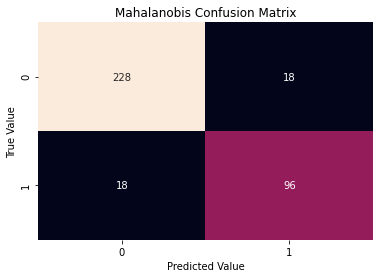

In [211]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print('Accuracy:\t{:0.5f}%'.format(accuracy_score(test_Y,pred_val)*100))
print("\n\n")
print("The Classification Report is")
print(classification_report(test_Y, pred_val))
print("\n\n")
# print("The Confusion Matrix is")
matrix = confusion_matrix(test_Y, pred_val)
plot1 = sns.heatmap(matrix,annot=True,cbar=False,fmt='d')  
plt.ylabel('True Value')  
plt.xlabel('Predicted Value')  
plt.title('Mahalanobis Confusion Matrix')  
plt.show()